In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('preprocessed_water_quality.csv')

# BIRCH Clustering


Clustering Metrics:
Silhouette Score: 0.539
Calinski-Harabasz Index: 135410.552
Davies-Bouldin Index: 0.500

Number of clusters: 5

Cluster distribution:
0    7907
1    5216
2    7138
3    4960
4    3281
Name: count, dtype: int64


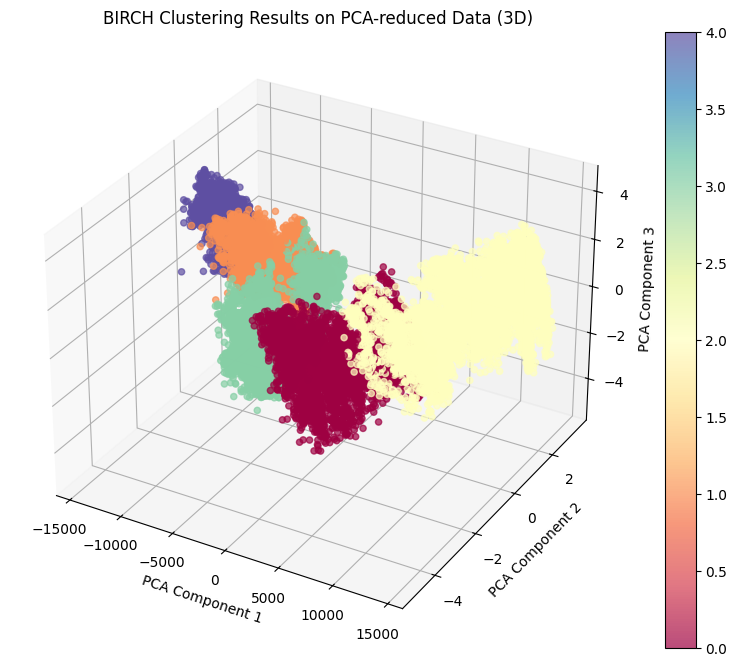


Cluster Characteristics:

Cluster 0:
Unnamed: 0    17410.000000
0                -1.335075
1                -0.716245
2                 0.548610
3                -0.154853
4                 0.029711
5                -0.251683
6                 0.371269
7                -0.230652
8                 0.053999
dtype: float64

Cluster 1:
Unnamed: 0    5888.500000
0                2.702535
1               -0.276996
2                0.221835
3                0.395145
4               -0.196387
5                0.116093
6               -0.112184
7               -0.130924
8               -0.429298
dtype: float64

Cluster 2:
Unnamed: 0    24932.500000
0                -1.139989
1                 0.812682
2                -1.465380
3                 0.094809
4                -0.075534
5                 0.215903
6                 0.045321
7                 0.185095
8                -0.086946
dtype: float64

Cluster 3:
Unnamed: 0    10976.500000
0                -0.492842
1                -0.570577


In [2]:
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA to reduce data to 3D for visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# Create BIRCH clustering model
birch = Birch(n_clusters=5)  # Adjust clusters as needed

# Fit and predict clusters
clusters = birch.fit_predict(df)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Calculate clustering evaluation metrics
silhouette = silhouette_score(df, clusters)
calinski = calinski_harabasz_score(df, clusters)
davies = davies_bouldin_score(df, clusters)

print("\nClustering Metrics:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

# Print basic clustering information
print(f"\nNumber of clusters: {len(set(clusters))}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of PCA-reduced data
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], 
                      c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('BIRCH Clustering Results on PCA-reduced Data (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# Print cluster characteristics
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.mean().drop('Cluster'))

# Fuzzy C-Means


Clustering Metrics:
Silhouette Score: 0.560
Calinski-Harabasz Index: 170336.920
Davies-Bouldin Index: 0.500

Number of clusters: 5

Cluster distribution:
0    5845
1    5845
2    5458
3    5458
4    5896
Name: count, dtype: int64


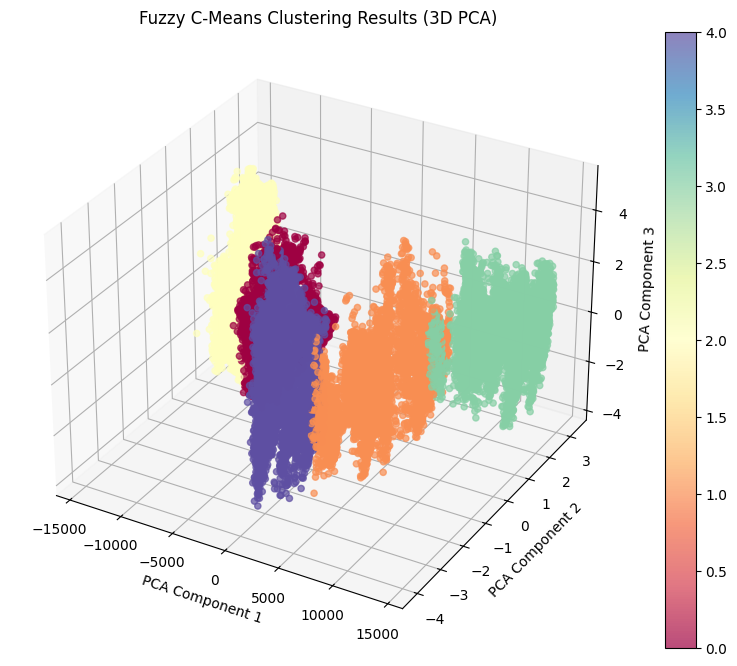


Cluster Characteristics:

Cluster 0:
Unnamed: 0    8380.000000
0                1.683480
1               -0.490743
2                0.535974
3                0.635521
4               -0.190721
5               -0.146057
6               -0.075334
7               -0.056412
8               -0.209632
dtype: float64

Cluster 1:
Unnamed: 0    20121.000000
0                -1.248492
1                -0.343908
2                -0.005031
3                 0.116606
4                -0.075633
5                -0.199590
6                 0.341104
7                -0.054562
8                 0.278012
dtype: float64

Cluster 2:
Unnamed: 0    2728.500000
0                2.164917
1                0.798181
2                0.045229
3               -0.550525
4                0.185014
5                0.207498
6               -0.360312
7                0.091994
8                0.147222
dtype: float64

Cluster 3:
Unnamed: 0    25772.500000
0                -0.998236
1                 1.124036
2         

In [3]:
from fcmeans import FCM
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- PCA Dimensionality Reduction to 3 Components ---
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# --- Fuzzy C-Means Clustering ---
n_clusters = 5
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(df.values)

# Predict cluster labels
clusters = fcm.predict(df.values)
df['Cluster'] = clusters

# --- Evaluation Metrics (Optional: Fuzzy labels can cause small inconsistency) ---
if len(np.unique(clusters)) > 1:
    silhouette = silhouette_score(df.drop('Cluster', axis=1), clusters)
    calinski = calinski_harabasz_score(df.drop('Cluster', axis=1), clusters)
    davies = davies_bouldin_score(df.drop('Cluster', axis=1), clusters)
    print("\nClustering Metrics:")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {calinski:.3f}")
    print(f"Davies-Bouldin Index: {davies:.3f}")

# --- Cluster Info ---
print(f"\nNumber of clusters: {n_clusters}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# --- 3D Visualization ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2],
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('Fuzzy C-Means Clustering Results (3D PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# --- Cluster Characteristics ---
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.mean().drop('Cluster'))

# GMM


Clustering Metrics:
Silhouette Score: 0.560
Calinski-Harabasz Index: 170336.920
Davies-Bouldin Index: 0.500

Number of clusters: 5

Cluster distribution:
0    5896
1    5458
2    5458
3    5845
4    5845
Name: count, dtype: int64


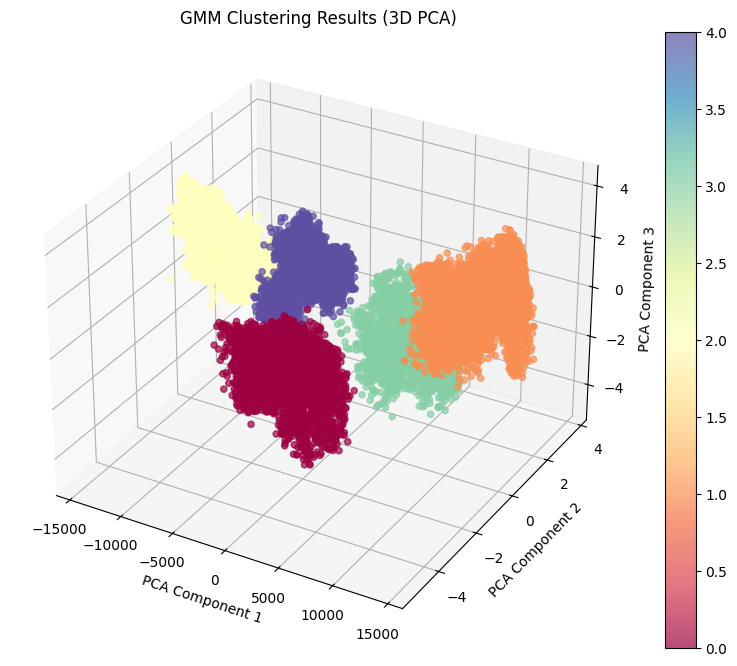


Cluster Characteristics:

Cluster 0:
Unnamed: 0    14250.500000
0                -1.511236
1                -0.951989
2                 1.195544
3                -0.303811
4                 0.152800
5                -0.011821
6                -0.049967
7                -0.032132
8                -0.074739
dtype: float64

Cluster 1:
Unnamed: 0    25772.500000
0                -0.998236
1                 1.124036
2                -1.905304
3                 0.073260
4                -0.064836
5                 0.175427
6                 0.129675
7                 0.061559
8                -0.139714
dtype: float64

Cluster 2:
Unnamed: 0    2728.500000
0                2.164917
1                0.798181
2                0.045229
3               -0.550525
4                0.185014
5                0.207498
6               -0.360312
7                0.091994
8                0.147222
dtype: float64

Cluster 3:
Unnamed: 0    20121.000000
0                -1.248492
1                -0.343908


In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- PCA Dimensionality Reduction to 3 Components ---
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# --- GMM Clustering ---
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(df.values)

# Predict cluster labels
clusters = gmm.predict(df.values)
df['Cluster'] = clusters

# --- Evaluation Metrics ---
if len(np.unique(clusters)) > 1:
    silhouette = silhouette_score(df.drop('Cluster', axis=1), clusters)
    calinski = calinski_harabasz_score(df.drop('Cluster', axis=1), clusters)
    davies = davies_bouldin_score(df.drop('Cluster', axis=1), clusters)
    print("\nClustering Metrics:")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {calinski:.3f}")
    print(f"Davies-Bouldin Index: {davies:.3f}")

# --- Cluster Info ---
print(f"\nNumber of clusters: {n_clusters}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# --- 3D Visualization ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2],
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('GMM Clustering Results (3D PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# --- Cluster Characteristics ---
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.mean().drop('Cluster'))

## K-Meioids


Clustering Metrics (K-Medoids):
Silhouette Score: 0.179
Calinski-Harabasz Index: 6422.683
Davies-Bouldin Index: 1.850

Number of clusters: 5

Cluster distribution:
0     3125
1    10542
2     2954
3     8291
4     3590
Name: count, dtype: int64


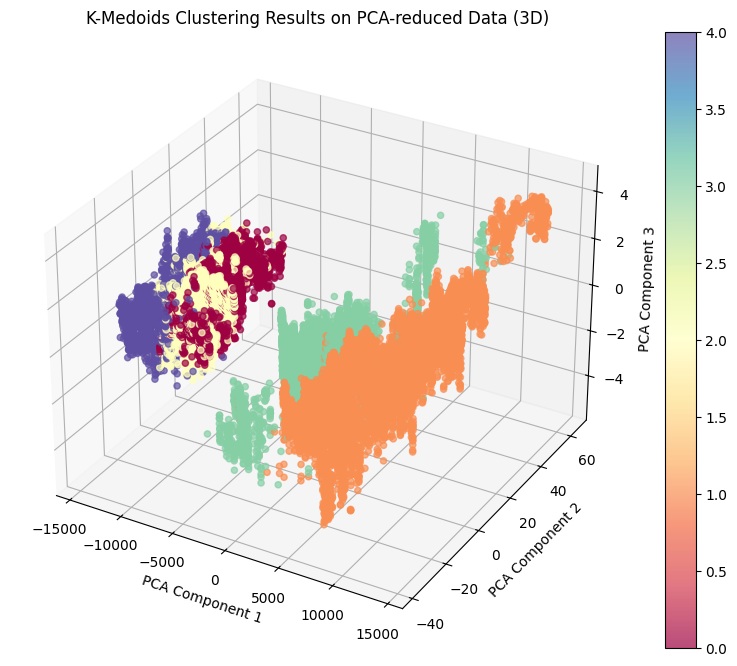


Cluster Characteristics:

Cluster 0:
Unnamed: 0    6890.912000
0                2.833956
1               -0.658865
2                0.114331
3                0.408350
4               -0.831005
5               -0.143489
6               -0.111796
7               -0.189070
8               -0.470001
dtype: float64

Cluster 1:
Unnamed: 0    23101.593056
0                -1.162626
1                 0.503155
2                -0.974666
3                 0.119305
4                -0.085225
5                -0.064991
6                 0.261681
7                 0.036429
8                 0.005237
dtype: float64

Cluster 2:
Unnamed: 0    5965.722749
0                2.687999
1               -0.140189
2                0.278771
3                0.784058
4                0.774980
5                0.249037
6               -0.002258
7               -0.052947
8               -0.373645
dtype: float64

Cluster 3:
Unnamed: 0    13977.905078
0                -1.451144
1                -0.865938
2         

In [4]:
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==============================
# Step 1: Apply PCA for Visualization
# ==============================
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# ==============================
# Step 2: Normalize Data
# ==============================
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# ==============================
# Step 3: Apply K-Medoids Clustering
# ==============================
n_clusters = 5  # Adjust the number of clusters as needed

kmedoids = KMedoids(n_clusters=n_clusters, metric="euclidean", random_state=42)
clusters = kmedoids.fit_predict(df_scaled)

df['Cluster'] = clusters  # Store the cluster labels in the DataFrame

# ==============================
# Step 4: Evaluate Clustering
# ==============================
silhouette = silhouette_score(df_scaled, clusters)
calinski = calinski_harabasz_score(df_scaled, clusters)
davies = davies_bouldin_score(df_scaled, clusters)

print("\nClustering Metrics (K-Medoids):")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

print(f"\nNumber of clusters: {len(set(clusters))}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# ==============================
# Step 5: 3D Visualization
# ==============================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], 
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('K-Medoids Clustering Results on PCA-reduced Data (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# ==============================
# Step 6: Cluster Characteristics
# ==============================
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.mean().drop('Cluster'))

# OPTICS


Clustering Metrics (excluding noise points):
Silhouette Score: 0.813
Calinski-Harabasz Index: 113896.928
Davies-Bouldin Index: 0.236

Number of clusters found: 2
Number of noise points: 14460

Cluster distribution:
-1    14460
 0     9667
 1     4375
Name: count, dtype: int64


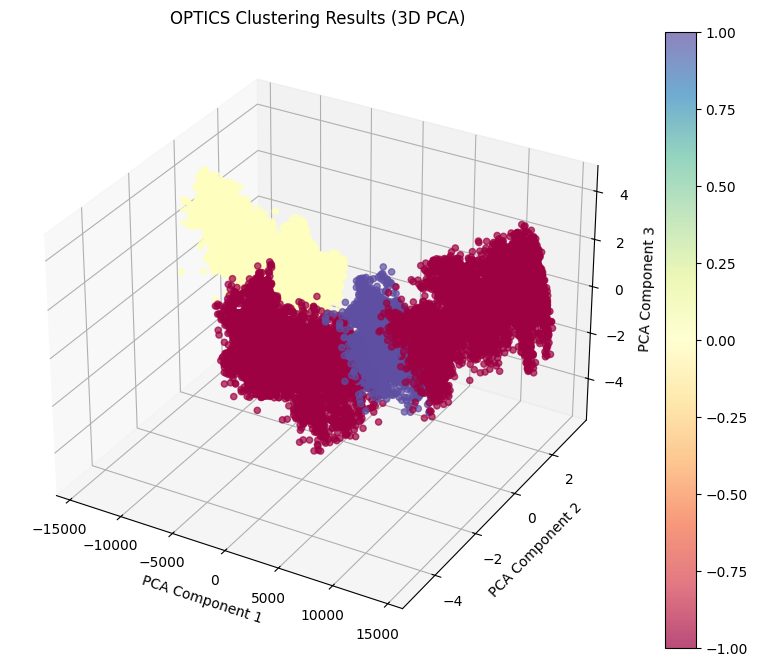


Cluster Characteristics:

Cluster 0:
Unnamed: 0    4836.000000
0                2.511837
1                0.193153
2                0.158714
3                0.020889
4               -0.025372
5                0.063831
6               -0.182311
7                0.022223
8               -0.140751
dtype: float64

Cluster 1:
Unnamed: 0    19721.000000
0                -1.311384
1                -0.230067
2                 0.033266
3                 0.152405
4                -0.079892
5                -0.509624
6                 0.463571
7                -0.106679
8                 0.136836
dtype: float64


In [2]:
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- PCA Dimensionality Reduction to 3 Components ---
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# --- OPTICS Clustering ---
optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.1) 
clusters = optics.fit_predict(df)

# --- Add cluster labels ---
df['Cluster'] = clusters

# --- Calculate Clustering Metrics (excluding noise points) ---
mask = clusters != -1
if len(np.unique(clusters[mask])) > 1:
    silhouette = silhouette_score(df.drop('Cluster', axis=1)[mask], clusters[mask])
    calinski = calinski_harabasz_score(df.drop('Cluster', axis=1)[mask], clusters[mask])
    davies = davies_bouldin_score(df.drop('Cluster', axis=1)[mask], clusters[mask])
    print("\nClustering Metrics (excluding noise points):")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {calinski:.3f}")
    print(f"Davies-Bouldin Index: {davies:.3f}")

# --- Basic Cluster Information ---
print(f"\nNumber of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Number of noise points: {list(clusters).count(-1)}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# --- 3D Visualization ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2],
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('OPTICS Clustering Results (3D PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# --- Cluster Characteristics ---
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    if cluster != -1:
        cluster_data = df[df['Cluster'] == cluster]
        print(f"\nCluster {cluster}:")
        print(cluster_data.mean().drop('Cluster'))

## Hyperparameter Tuning

In [3]:
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np

# --- Hyperparameter Tuning for OPTICS ---
best_score = -1
best_params = {}
best_clusters = None

param_grid = {
    "min_samples": [5, 10, 20],
    "xi": [0.01, 0.05, 0.1],
    "min_cluster_size": [0.05, 0.1, 0.2]
}

for min_samples in param_grid["min_samples"]:
    for xi in param_grid["xi"]:
        for min_cluster_size in param_grid["min_cluster_size"]:
            optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
            clusters = optics.fit_predict(df)
            
            # Exclude noise points
            mask = clusters != -1
            if len(np.unique(clusters[mask])) > 1:
                silhouette = silhouette_score(df[mask], clusters[mask])
                calinski = calinski_harabasz_score(df[mask], clusters[mask])
                davies = davies_bouldin_score(df[mask], clusters[mask])
                
                score = silhouette  # Prioritizing silhouette score for best clustering
                if score > best_score:
                    best_score = score
                    best_params = {"min_samples": min_samples, "xi": xi, "min_cluster_size": min_cluster_size}
                    best_clusters = clusters

# --- Apply Best OPTICS Model ---
optics = OPTICS(**best_params)
clusters = optics.fit_predict(df)
df['Cluster'] = clusters

# --- Print Best Parameters ---
print("\nBest Parameters:")
print(best_params)

# --- Calculate Clustering Metrics (excluding noise points) ---
mask = clusters != -1
if len(np.unique(clusters[mask])) > 1:
    silhouette = silhouette_score(df[mask], clusters[mask])
    calinski = calinski_harabasz_score(df[mask], clusters[mask])
    davies = davies_bouldin_score(df[mask], clusters[mask])
    print("\nBest Clustering Metrics (excluding noise points):")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {calinski:.3f}")
    print(f"Davies-Bouldin Index: {davies:.3f}")

# --- Basic Cluster Information ---
print(f"\nNumber of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Number of noise points: {list(clusters).count(-1)}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())



Best Clustering Metrics (excluding noise points):
Silhouette Score: 0.813
Calinski-Harabasz Index: 113896.929
Davies-Bouldin Index: 0.236

Number of clusters found: 2
Number of noise points: 14460

Cluster distribution:
-1    14460
 0     9667
 1     4375
Name: count, dtype: int64


# SOM

Training SOM...
SOM training complete.

Clustering Metrics (SOM):
Silhouette Score: -0.084
Calinski-Harabasz Index: 673.918
Davies-Bouldin Index: 3.553

Number of clusters: 41

Cluster distribution:
2        6
3      340
4      587
5      940
6      549
7      124
8      218
9      804
12      38
13     102
14     104
15      83
16     690
17    1400
18     203
19    2489
22     678
23    1193
24     274
25     611
26     231
27      50
28     722
29     359
34     100
35     142
36    1044
37     652
38     303
39     190
44       1
45    9246
46     134
47      51
48     437
49     301
58    1663
59     757
92     116
93     167
98     403
Name: count, dtype: int64


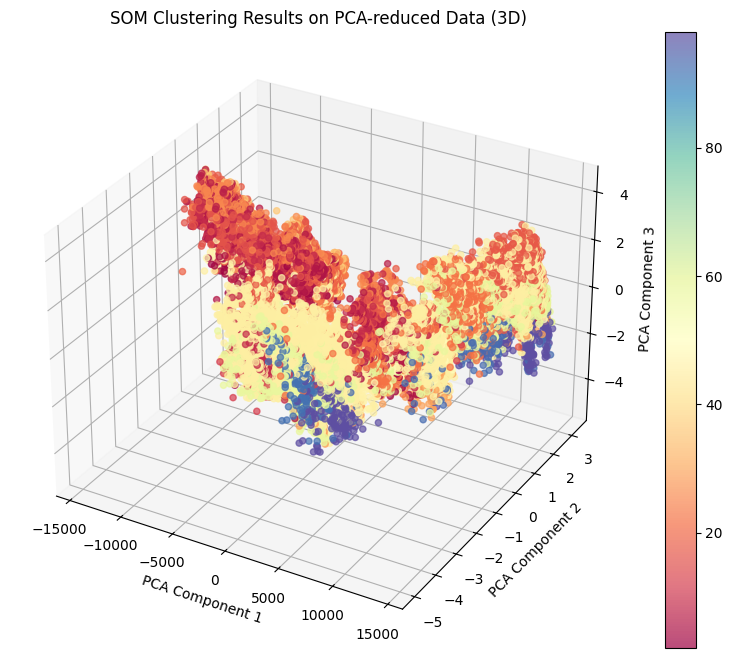


Cluster Characteristics:

Cluster 2:
Unnamed: 0    7298.000000
0                1.229246
1               -0.934485
2               -0.099276
3               -0.822942
4               -1.060617
5               -0.675026
6               -0.954911
7                0.454956
8               -1.330520
dtype: float64

Cluster 3:
Unnamed: 0    5058.279412
0                1.721671
1               -0.193939
2               -0.366313
3               -1.282411
4               -0.311111
5               -0.114181
6               -1.103045
7                0.725074
8                0.080424
dtype: float64

Cluster 4:
Unnamed: 0    11457.647359
0                 0.683359
1                -0.860669
2                -0.696064
3                -1.164141
4                -0.874234
5                -0.278182
6                 0.141979
7                -0.012232
8                 0.399012
dtype: float64

Cluster 5:
Unnamed: 0    10909.842553
0                 1.373203
1                -0.303197
2         

In [3]:
from minisom import MiniSom
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==============================
# Step 1: Apply PCA for visualization
# ==============================
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# ==============================
# Step 2: Normalize Data
# ==============================
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# ==============================
# Step 3: Initialize and Train SOM
# ==============================
som_grid_rows = 10
som_grid_cols = 10

som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=df.shape[1], sigma=1.0, learning_rate=0.5)

print("Training SOM...")
som.train_random(df_scaled, num_iteration=1000)
print("SOM training complete.")

# ==============================
# Step 4: Assign clusters
# ==============================
bmu_indices = np.array([som.winner(x) for x in df_scaled])
clusters = [r * som_grid_cols + c for r, c in bmu_indices]
df['Cluster'] = clusters

# ==============================
# Step 5: Evaluate clustering
# ==============================
silhouette = silhouette_score(df_scaled, clusters)
calinski = calinski_harabasz_score(df_scaled, clusters)
davies = davies_bouldin_score(df_scaled, clusters)

print("\nClustering Metrics (SOM):")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

print(f"\nNumber of clusters: {len(set(clusters))}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# ==============================
# Step 6: 3D Visualization
# ==============================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], 
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('SOM Clustering Results on PCA-reduced Data (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# ==============================
# Step 7: Cluster Characteristics
# ==============================
print("\nCluster Characteristics:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.mean().drop('Cluster'))